# Exercícios 2.3 #

## Chamadas das funções do método de Newton, Secante e Falsa Posição ##

Essas funções serão utilizadas para a resolução dos exercícios

In [5]:
#Algorítmo para método de Newton
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def flinha(a,x,fx): #Retorna o valor numérico da derivada da função digitada pelo usuário
    flinha=fx.diff(x)
    return (flinha.subs(x,a))

def validar_input(mensagem): #Função para verificar se a entrada fornecida pelo usuário é um número, mesmo que seja negativo
    while True:
        try:
            entrada = float(input(mensagem))
        except ValueError:
            print ("O valor fornecido é inválido. Por favor, entre com um valor válido.")
        else:
            return entrada
            break

            
def metodo_Newton():
    x = sp.symbols('x') #Define x como a variável da função f(x) a ser especificada pelo usuário 
    fx = sp.sympify(input("Digite a função f(x): ")) #Solicita que o usuário entre com a função f(X)

    #Pergunta ao usuário se ele deseja ou não plotar o gráfico do método ao final, para facilitar a visualização
    while True:
        grafico = input('Deseja plotar o gráfico ao final? (s/n) ')
    
        if grafico not in ['s','n']:
            print ('Opção inválida. Por favor, selecione s para sim ou n para não.')
            continue
        else:
            break

    #Pergunta ao usuário se ele deseja ou não visualizar a tabela contendo todas as iterações ao final
    while True:
        tabela = input('Deseja visualizar a tabela de iterações ao final? (s/n) ')
    
        if tabela not in ['s','n']:
            print ('Opção inválida. Por favor, selecione s para sim ou n para não.')
            continue
        else:
            break

    N = abs(validar_input('Digite o número máximo de iterações que deseja: ')) #Solicita ao usuário o número de iterações máximo

    #Solicita ao usuário um chute inicial para o valor da raiz, e inicia uma lista que guardará todos os valores estimados
    chute = validar_input('Digite o valor do chute inicial para a raiz: ')
    p = [chute]


    TOL = abs(validar_input('Digite a tolerância desejada: ')) #Solicita do usuário a tolerância desejada


    # Solicita que o usuário selecione o critério de parada entre as opções fornecida, e valida a escolha.
    while True:
        try:
            parada = abs(int(input('Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): '))) #Seleção do critério de parada
        except ValueError:
            print('Critério inválido!')
            continue
        if parada > 3:
            print('Critério inválido!')
            continue
        else:
            break


    i = 0 #Inicia o contador de iterações para o método de Newton

    if parada == 1:
        if tabela == 's':
            print('\nIteração \t pn \t\t\t |p_n-p_(n-1)|')
        while i < N:
            z = flinha(p[i],x,fx)
            if z==0: #Verifica se a derivada da função no ponto analisado é igual a zero
                print ('O método de Newton-Raphson falhou: A derivada da função na', '\033[1m' + str(i) + 'ª' + '\033[0m' , ' iteração é igual a zero') #Mostra mensagem de erro

            s=p[i] - fx.subs(x,p[i])/(flinha(p[i],x,fx))  #Aplica a formula de Newton-Raphson
            p.append(s)
            dif = abs(p[i+1]-p[i]) #Calcula o valor da diferença entre p_n e p_n-1
        
            if tabela == 's':
                print(i, '\t\t', "{:.10f}".format(p[i]), '\t\t', '{:.10f}'.format(dif))
            
            if dif < TOL: #Termina o método caso a tolerância seja atingida
                break
            else:
                i=i+1
                 
    elif parada == 2:
        if tabela == 's':
            print('\nIteração \t pn \t\t\t |p_n - p_(n-1)|/|p_n|')
        while i < N:
            z = flinha(p[i],x,fx)
            if z==0: #Verifica se a derivada da função no ponto analisado é igual a zero
                print ('O método de Newton-Raphson falhou: A derivada da função na', '\033[1m' + str(i) + 'ª' + '\033[0m' , ' iteração é igual a zero') #Mostra mensagem de erro

            s=p[i] - fx.subs(x,p[i])/(flinha(p[i],x,fx))  #Aplica a formula de Newton-Raphson
            p.append(s)
            dif = abs(p[i+1]-p[i])/abs(p[i+1]) #Calcula a diferença relativa entre o valor de p_n e p_n-1
        
            if tabela == 's': #Imprime mais uma linha da tabela
                print(i, '\t\t', "{:.10f}".format(p[i]), '\t\t', '{:.10f}'.format(dif))
        
            if dif < TOL: #Termina o método caso a tolerância seja atingida
                break
            else:
                i=i+1

    elif parada == 3:
        if tabela == 's':
            print('\nIteração \t pn \t\t\t f(p_n)')
        while i < N:
            z = flinha(p[i],x,fx)
            if z==0: #Verifica se a derivada da função no ponto analisado é igual a zero
                print ('O método de Newton-Raphson falhou: A derivada da função na', '\033[1m' + str(i) + 'ª' + '\033[0m' , ' iteração é igual a zero') #Mostra mensagem de erro
                break

            s=p[i] - fx.subs(x,p[i])/(flinha(p[i],x,fx))  #Aplica a formula de Newton-Raphson
            p.append(s)
            dif = abs(fx.subs(x,p[i+1])) #Calcula o valor de f(p_n)
        
            if tabela == 's': #Imprime mais uma linha da tabela
                print(i, '\t\t', "{:.10f}".format(p[i]), '\t\t', '{:.10f}'.format(dif))
            
            if dif < TOL: #Termina o método caso a tolerância seja atingida
                break
            else:
                i=i+1

    if i==N:
        print('\nO método de Newton-Raphson foi encerrado pois atingiu o número máximo de iterações, sem atender ao critério estabelecido.')
        print('\t • O valor estimado para a raiz até esse ponto é: ', '\033[1m' + str(p[i]) + '\033[0m' )
        print('\t • O valor do erro estimado é: ', '\033[1m' + str(dif) +'\033[0m' )
    
    else:
        print('\nO método de Newton-Raphson encontrou uma aproximação da raiz após', '\033[1m' + str(i) + '\033[0m', 'iterações!')
        print('\t • O valor estimado para a raiz é: ','\033[1m' + str(p[i]) +'\033[0m')
        print('\t • O valor do erro estimado é: ', '\033[1m' + str(dif) + '\033[0m')
    
    if grafico == 's': #Plot ao gráfico ao final, se o usuário assim decidiu
        dominio = np.arange(min(p)-1,max(p)+1,0.2) #Cria uma lista com valores entre o menor valor de p -1 e o maior valor de p +1
        imagem = [] #Cria uma lista vazia que abrigará o conjunto de pontos f(dominio)
        pontos = [] #Cria uma lista vazia que abrigará o conjunto de pontos f(p)
    
        for t in p: #Calcula os pontos f(p)
            pontos.append(fx.subs(x,t))

        for u in dominio: #Calcula os pontos f(domínio)
            imagem.append(fx.subs(x,u))
            
        plt.plot(p,pontos,'ro')
        plt.plot(dominio,imagem,linewidth=2)
        plt.show()
    #return p[i]

In [1]:
#Função Método da Secante para encontrar raízes de uma equação do tipo f(x)=0

from numpy import *

def metodo_Secante(f, p0, p1, tipo_tol, tol, N0):
    # Parâmetros: 
    # f: função do tipo f(x)=0 a qual se deseja encontrar a raiz
    # p0 e p1: aproximações iniciais para a raiz
    # tipo_tol: tipo de tolerância: 1: |p[n] - p[n-1]|; 2: |p[n] - p[n-1]|/|p[n]|; 3: |f(p[n])| ~= 0
    # tol: valor da tolerância | N0: número máximo de iterações
    
    # variáveis extras para o cálculo
    val_tol=0.0
    p = 0.0
    q = 0.0
    q0 = f(p0) 
    q1 = f(p1)

    print ("Método da Secante, com p0 =", p0, "e p1 =", p1, " tolerância de", tol, "\nn\t pn\t         f(pn)")
    print (0, '\t', "{:.10f}".format(p0), '\t', "{:.10f}".format(q0))
    print (1, '\t', "{:.10f}".format(p1), '\t', "{:.10f}".format(q1))

    # aplica o método da Secante
    for n in range (2, N0+1):
        p = p1 - (q1*(p1-p0))/(q1-q0) # aplica a aproximação do método da Secante
        q = f(p) # guarda o valor de f(p)
        # calcula as condições de parada
        if (tipo_tol == 2 and p != 0.0): # a condição de parada será |p[n] - p[n-1]|/|p[n]|
            val_tol = abs((p-p1)/p)
        elif (tipo_tol == 3):
            val_tol = abs(q) # a condição de parada será |f(p[n])| -= 0
        else: #se não foi escolhida a condição 2 ou 3, assume a condição 1
            val_tol = abs(p-p1) # a condição de parada será |p[n] - p[n-1]|
        # imprime os resultados da iteração n
        print (n, '\t', "{:.10f}".format(p), '\t', "{:.10f}".format(q))
        # testa as condições de parada
        if (val_tol <= tol):
            print ("A raiz da função, dentro dos parâmetros de tolerância, é", p)
            break
        # atualiza os valores
        q0 = q1
        p0 = p1
        q1 = q
        p1 = p
    print ("O método da Secante foi encerrado após", n, "iterações.")
    # return p

In [4]:
#Função Método da Falsa Posição para encontrar raízes de uma equação do tipo f(x)=0

from numpy import *

def falsa_posicao(f, p0, p1, tipo_tol, tol, N0):
    # Parâmetros: 
    # f: função do tipo f(x)=0 a qual se deseja encontrar a raiz
    # p0 e p1: aproximações iniciais para a raiz
    # tipo_tol: tipo de tolerância: 1: |p[n] - p[n-1]|; 2: |p[n] - p[n-1]|/|p[n]|; 3: |f(p[n])| ~= 0
    # tol: valor da tolerância | N0: número máximo de iterações
    
    # variáveis extras para o cálculo
    val_tol=0.0
    p = 0.0
    q = 0.0
    q0 = f(p0) 
    q1 = f(p1)

    print ("Raiz de f(x) = 0, pelo método da Falsa Posição \nn\t pn\t         f(pn)")
    print (0, '\t', "{:.10f}".format(p0), '\t', "{:.10f}".format(q0))
    print (1, '\t', "{:.10f}".format(p1), '\t', "{:.10f}".format(q1))

    # Essa parte é igual o metodo da secante
    for n in range (2, N0+1):
        p = p1 - (q1*(p1-p0))/(q1-q0) # aplica a aproximação do método da Secante
        q = f(p) # guarda o valor de f(p)
        # calcula as condições de parada
        if (tipo_tol == 2 and p != 0.0): # a condição de parada será |p[n] - p[n-1]|/|p[n]|
            val_tol = abs((p-p1)/p)
        elif (tipo_tol == 3):
            val_tol = abs(q) # a condição de parada será |f(p[n])| -= 0
        else: #se não foi escolhida a condição 2 ou 3, assume a condição 1
            val_tol = abs(p-p1) # a condição de parada será |p[n] - p[n-1]|
        # imprime os resultados da iteração n
        print (n, '\t', "{:.10f}".format(p), '\t', "{:.10f}".format(q))
        # testa as condições de parada
        if (val_tol <= tol):
            print ("A raiz da função, dentro dos parâmetros de tolerância, é", p)
            break
        
        #a partir daqui difere do metodo da secante
        q = f(p)
        if(q * q1 < 0):
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    print ("O método da Falsa Posição foi encerrado após", n, "iterações.")
    # return p

# Exercícios 2.3 #

## (1) ##

Seja $f(x) = x^2 -6$ e $p_0 = 1$ . Utilize o método de Newton para determinar $p_2$

Digite a função f(x): x^2 -6
Deseja plotar o gráfico ao final? (s/n) s
Deseja visualizar a tabela de iterações ao final? (s/n) s
Digite o número máximo de iterações que deseja: 5
Digite o valor do chute inicial para a raiz: 1
Digite a tolerância desejada: 0.000001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 1

Iteração 	 pn 			 |p_n-p_(n-1)|
0 		 1.0000000000 		 2.5000000000
1 		 3.5000000000 		 0.8928571429
2 		 2.6071428571 		 0.1528864971
3 		 2.4542563601 		 0.0047619885
4 		 2.4494943716 		 0.0000046288

O método de Newton-Raphson foi encerrado pois atingiu o número máximo de iterações, sem atender ao critério estabelecido.
	 • O valor estimado para a raiz até esse ponto é:  2.44948974278755
	 • O valor do erro estimado é:  4.62881941354354e-6


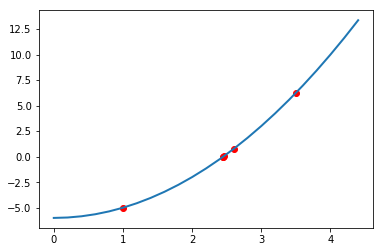

In [49]:
metodo_Newton()

## (3) ##

Seja $f(x) = x^{2} - 6$. Com ${p}_{0} = 3$ e ${p}_{1} = 2$, determine ${p}_{3}$.

**a.** Utilize o método da Secante.

**b.** Utilize o método da Falsa Posição.

**c.** Qual é o resultado mais próximo de $\sqrt{6}$, (a) ou (b)?

In [12]:
print("3.a)"); metodo_Secante(lambda x:(x**2 - 6), 3.0, 2.0, 1, 0.0, 3)

3.a)
Método da Secante, com p0 = 3.0 e p1 = 2.0  tolerância de 0.0 
n	 pn	         f(pn)
0 	 3.0000000000 	 3.0000000000
1 	 2.0000000000 	 -2.0000000000
2 	 2.4000000000 	 -0.2400000000
3 	 2.4545454545 	 0.0247933884
O método da Secante foi encerrado após 3 iterações.


2.4545454545454546

In [13]:
print("3.b)"); falsa_posicao(lambda x:(x**2 - 6), 3.0, 2.0, 1, 0.0, 3)

3.b)
Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 3.0000000000 	 3.0000000000
1 	 2.0000000000 	 -2.0000000000
2 	 2.4000000000 	 -0.2400000000
3 	 2.4444444444 	 -0.0246913580
O método da Falsa Posição foi encerrado após 3 iterações.


2.444444444444444

3.c)

A tabela abaixo demonstra o resultado:

|     Método    |            Valor              | Módulo do Erro |
|:-------------:|:-----------------------------:|:--------------:|
|   Raiz Real   | $\sqrt{6} = 2.44948974278$    |       0        |
|    Secante    |  ${p}_{3} = 2.45454545455$    | 0.00505571176  |
| Falsa Posição |  ${p}_{3} = 2.44444444444$    | 0.00504529834  |

O método da Secante e Falsa Posição diferem no resultado em ${p}_{3}$, pois o método da Falsa Posição escolhe um intervalo onde a raiz se encontra, o que se mostrou um pouco mais vantajoso, já que reduziu o erro em relação a raiz real $p^{*} = \sqrt{6}$

## 7) - Repita o Exercicio 5, utilizando o método da Secante.

---

#### Resolução - Letra A

$x^{3}-2x^{2}-5=0 $   $,   [1,4]$

In [ ]:
metodo_Secante(lambda x: ((x**3)-2*(x**2)-5), 1, 4, 1, 10**(-4), 20)

-----

#### Resolução - Letra B

$x^{3}-3x^{2}-1=0 $   $,   [-3,-2]$

In [ ]:
metodo_Secante(lambda x:((x**3)-3*(x**2)-1), -3, -2, 1, 10**(-4), 100)

---
### Resolução - Letra C

$x-co(x)=0 $   $,   [0,\frac{\pi}{2}]$

In [ ]:
metodo_Secante(lambda x:(x-cos(x)), 0, pi/2, 1, 10**(-4), 100) 

---
### Resolução - Letra D

$x-0.8-0.2sen(x)=0 $   $,   [0,\frac{\pi}{2}]$

In [ ]:
metodo_Secante(lambda x:(x-0.8-0.2*sin(x)), 0, pi/2, 1, 10**(-4), 100)

## (9) ##

Repita o exercício 5, utilizando método da falsa posição

**a)** - $x^3 - 2*x^2 - 5 = 0, [1,4]$

In [7]:
## 9.A - Solução:
## O valor da raiz bate com a solução do livro, mas o número de iterações difere(no livro retorna com p11)
falsa_posicao(lambda x:(math.pow(x,3) - 2*math.pow(x,2) - 5), 1, 4, 1, math.pow(10,-4), 20)

Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 1.0000000000 	 -6.0000000000
1 	 4.0000000000 	 27.0000000000
2 	 1.5454545455 	 -6.0856498873
3 	 1.9969343961 	 -5.0122248528
4 	 2.3105588082 	 -3.3420252785
5 	 2.4966424700 	 -1.9043164236
6 	 2.5956888682 	 -0.9864862639
7 	 2.6451889601 	 -0.4855969518
8 	 2.6691248460 	 -0.2330024091
9 	 2.6805116594 	 -0.1104265800
10 	 2.6858862183 	 -0.0520272619
11 	 2.6884135609 	 -0.0244445378
12 	 2.6895999359 	 -0.0114700503
13 	 2.6901563793 	 -0.0053787639
14 	 2.6904172658 	 -0.0025215914
15 	 2.6905395593 	 -0.0011819752
16 	 2.6905968809 	 -0.0005540062
A raiz da função, dentro dos parâmetros de tolerância, é 2.690596880893969
O método da Falsa Posição foi encerrado após 16 iterações.


2.690596880893969

**b)** - $ x^3 + 3*x^2 -1 = 0$, [-3,-2]

In [8]:
## 9.B - Solução:
## O valor da raiz bate com a solução do livro, mas o número de iterações difere(no livro retorna com p7)
falsa_posicao(lambda x:(math.pow(x,3) + 3*math.pow(x,2)-1), -3, -2, 1, math.pow(10,-4), 20)

Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 -3.0000000000 	 -1.0000000000
1 	 -2.0000000000 	 3.0000000000
2 	 -2.7500000000 	 0.8906250000
3 	 -2.8677685950 	 0.0874838631
4 	 -2.8784060992 	 0.0074324220
5 	 -2.8793031690 	 0.0006234072
6 	 -2.8793783654 	 0.0000522330
A raiz da função, dentro dos parâmetros de tolerância, é -2.8793783653904685
O método da Falsa Posição foi encerrado após 6 iterações.


-2.8793783653904685

**c)**  $ x - cos(x)  = 0$, [0,$\pi$/2]

In [9]:
## 9.C - Solução:
## O valor da raiz bate com a solução do livro, mas o número de iterações difere(no livro retorna com p6)
falsa_posicao(lambda x:(x-cos(x)), 0, math.pi/2, 1, math.pow(10,-4), 20)

Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 0.0000000000 	 -1.0000000000
1 	 1.5707963268 	 1.5707963268
2 	 0.6110154704 	 -0.2080503951
3 	 0.7232695414 	 -0.0263762877
4 	 0.7372659061 	 -0.0030434567
5 	 0.7388777688 	 -0.0003470316
6 	 0.7390615217 	 -0.0000395164
7 	 0.7390824450 	 -0.0000044990
A raiz da função, dentro dos parâmetros de tolerância, é 0.7390824450103588
O método da Falsa Posição foi encerrado após 7 iterações.


0.7390824450103588

**d)**  $ x - 0.8 - 0.2 * sin(x)  = 0 $, [0,$\pi$/2]

In [10]:
## 9.D - Solução:
## O valor da raiz bate com a solução do livro, mas o número de iterações difere(no livro retorna com p5)
falsa_posicao(lambda x:(x- 0.8 -0.2*sin(x)), 0, math.pi/2, 1, math.pow(10,-4), 20)

Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 0.0000000000 	 -0.8000000000
1 	 1.5707963268 	 0.5707963268
2 	 0.9167204762 	 -0.0420016325
3 	 0.9615513264 	 -0.0024647334
4 	 0.9641707726 	 -0.0001445190
5 	 0.9643243242 	 -0.0000084733
6 	 0.9643333270 	 -0.0000004968
A raiz da função, dentro dos parâmetros de tolerância, é 0.9643333269804453
O método da Falsa Posição foi encerrado após 6 iterações.


0.9643333269804453

## (11) ##

Utilize todos os três métodos desta seção para encontrar soluções com precisõ de $10^{-5}$ para os problemas a seguir.

**a) $3x-e^x=0$** para $1\leqslant x \leqslant 2$

**b) $x+3\cos x -e^x =0$** para $0 \leqslant x \leqslant 1$.

In [17]:
# Solução da 11.A pelo método de Newton
metodo_Newton()
print('')
# Solução da 11.A pelo método da Secante
metodo_Secante( lambda x:(3*x-np.exp(x)), 1, 2, 3, math.pow(10,-5), 20)
print('')
# Solução da 11.A pelo método da Falsa posição
falsa_posicao( lambda x:(3*x-np.exp(x)), 1, 2, 3, math.pow(10,-5), 20)

Digite a função f(x): 3*x-2.718281828459045**x
Deseja plotar o gráfico ao final? (s/n) n
Deseja visualizar a tabela de iterações ao final? (s/n) n
Digite o número máximo de iterações que deseja: 20
Digite o valor do chute inicial para a raiz: 1
Digite a tolerância desejada: 0.00001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 3

O método de Newton-Raphson encontrou uma aproximação da raiz após 4 iterações!
	 • O valor estimado para a raiz é:  0.6189967797415396
	 • O valor do erro estimado é:  3.863441289109204e-9

Método da Secante, com p0 = 1 e p1 = 2  tolerância de 1e-05 
n	 pn	         f(pn)
0 	 1.0000000000 	 0.2817181715
1 	 2.0000000000 	 -1.3890560989
2 	 1.1686153399 	 0.2883116585
3 	 1.3115165547 	 0.2227510726
4 	 1.7970430096 	 -0.6406561086
5 	 1.4367778925 	 0.1032155100
6 	 1.4867662869 	 0.0375284615
7 	 1.5153257605 	 -0.0049261085
8 	 1.5120119343 	 0.0001883556
9 	 1.5121339760 	 0.0000008844
A raiz da função, dentro dos parâmetros de tole

In [19]:
# Solução da 11.A pelo método de Newton
metodo_Newton() #2.718281828459045
print('')
# Solução da 11.A pelo método da Secante
metodo_Secante( lambda x:(x+3*np.cos(x)-np.exp(x)), 0, 1, 3, math.pow(10,-5), 20)
print('')
# Solução da 11.A pelo método da Falsa posição
falsa_posicao( lambda x:(x+3*np.cos(x)-np.exp(x)), 0, 1, 3, math.pow(10,-5), 20)

Digite a função f(x): x+3*cos(x)-2.718281828459045**x
Deseja plotar o gráfico ao final? (s/n) n
Deseja visualizar a tabela de iterações ao final? (s/n) n
Digite o número máximo de iterações que deseja: 50
Digite o valor do chute inicial para a raiz: 0
Digite a tolerância desejada: 0.00001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 3

O método de Newton-Raphson foi encerrado pois atingiu o número máximo de iterações, sem atender ao critério estabelecido.
	 • O valor estimado para a raiz até esse ponto é:  4.032926482100511e+17
	 • O valor do erro estimado é:  1.578587598043891e+175147771709774542

Método da Secante, com p0 = 0 e p1 = 1  tolerância de 1e-05 
n	 pn	         f(pn)
0 	 0.0000000000 	 2.0000000000
1 	 1.0000000000 	 -0.0973749109
2 	 0.9535729591 	 0.0949273881
3 	 0.9764910300 	 0.0011678063
4 	 0.9767764821 	 -0.0000143521
5 	 0.9767730165 	 0.0000000021
A raiz da função, dentro dos parâmetros de tolerância, é 0.9767730165380571
O método da Sec

### Exercicio 13

Utilize o método de Newton para encontrar uma aproximação com precisão $10^{-4}$ do valor de x que produza o ponto no gráfico de $y = x^{2}$ mais próximo a (0,1)

[Sugestão: Minimize $[d(x)]^{2}$, onde $d(x)$ representa a distância de $(x, x^{2})$ a (0,1).] 

#### Resolução Exercicio 13

Tomemos $dx$ a distância de $(x,x^{2}) a (0,1)$. Portanto pelo teorema de Pitágoras:

$$dx = \sqrt{(x-1)^{2} + (x^{2}-0)^{2}}$$

ou seja,

$$dx = \sqrt{x^{4}+x^{2}-2x+1}$$

Como devemos minimizar o $[d(x)]^{2}$, teremos:

$$[d(x)]^{2} = x^{4}+x^{2}-2x+1$$

Minimizando,

$$[d(x)^{'}]^{2} = 4x^{3} + 2x - 2$$

e,

$$[d(x)^{''}]^{2} = 12x^{2} + 2$$

Observer que somente $d(x)^{''}$ é estritamente positivo (não possue raiz), por outro lado $[d(x)^{'}]^{2} = 4x^{3} + 2x - 2$, poderemos avaliar para ela.

Portanto devemos utilizar o metodo de Newton para determinar a Raiz e em seguida determinar o ponto do gráfico aonde $y=x^{2}$, logo:

In [ ]:
metodo_Newton()

Como temos o x=0.58975, teremos que $f(x)=(0.58975)^2=0.347805$, e o ponto será $(0.58975, 0.347805)$.

## (15) ##

O seguinte enunciado descreve o método de Newton de forma gráfica: suponha que $f'(x)$ exista em $[a, b]$ e que $f'(x) \neq 0$ em $[a, b]$. Suponha também que exista um $p \in [a, b]$, tal que $f(p) = 0$, e seja ${p}_{0} \in [a, b]$ arbitrário. Seja ${p}_{1}$ o ponto no qual a reta tangente a $f$ em $({p}_{0}, f({p}_{0}))$ cruza o eixo x. Para cada $n \geqslant 1$, seja ${p}_{n}$ a interseção da reta tangente a $f$ em $({p}_{n-1}, f({p}_{n-1}))$ com o eixo x. Deduza a fórmula que descreve esse método.

**Resposta:**

Como para cada $n \geqslant 1$, ${p}_{n}$ será a interseção da reta tangente a $f$ em $({p}_{n-1}, f({p}_{n-1}))$ com o eixo x, podemos escrever a equação desta reta tangente e determinar uma fórmula que retorne o valor de x para o qual a reta tangente toca o eixo x, determinando assim ${p}_{n}$ em cada ireração.

A forma fundamental de uma equação linear é representada por $(y - {y}_{1}) = m . (x - {x}_{1})$, onde $m$ representa o declive (coeficiente angular da reta) e $(x - {x}_{1})$ representa um ponto da reta. A inclinação $m$ da reta tangente a $f$ em $({p}_{n-1}, f({p}_{n-1}))$ é dada pela derivada primeira neste ponto:

$$m = f'({p}_{n-1}).$$

Como queremos o ponto x onde a reta tangente toca o eixo x, isso significa encontrar um x, chamado de ${p}_{n}$, tal que leve a $y = 0$. Desta forma, a equação linear da reta tangente pode ser escrita como:

$$(y - {y}_{1}) = m . (x - {x}_{1})$$

$$(0 - f({p}_{n-1})) = f'({p}_{n-1}) . ({p}_{n} - {p}_{n-1})$$

Isolando ${p}_{n}$ obtém-se:

$$\frac{-f({p}_{n-1})}{f'({p}_{n-1})} + {p}_{n-1} = {p}_{n}\text{, reagrupando: } {p}_{n} = {p}_{n-1} - \frac{f({p}_{n-1})}{f'({p}_{n-1})},$$

que é a fórmula para a aplicação do método de Newton.

## (17) ##

O polinômio de quarto grau $$f(x) = 230 x^{4} + 18 x^{3} + 9 x^{2} - 221 x - 9$$tem dois zeros reais, um em $[-1, 0]$ e outro em $[0, 1]$. Tente encontrar a aproximação desses zeros com a precisão de $10^{-6}$, utilizando os seguintes métodos:

**a.** Método da Falsa Posição;

**b.** Método da Secante;

**c.** Método de Newton.

Utilize as extremidades de cada intervalo como aproximações iniciais em (a) e (b) e os pontos médios como as aproximações iniciais em (c).

**Resposta:**

Apesar do método de Newton (3 iterações), seguido pelo método da Secante (5 iterações), terem mostrado uma convergência mais rápida para a primeira raiz no intervalo $[-1, 0]$ em relação ao método da Falsa Posição (17 iterações), eles falharam em convergir para a segunda raiz no intervalo $[0, 1]$, convergindo novamente para a mesma raiz do intervalo $[-1, 0]$. Somente o método da Falsa Posição foi capaz de convergir corretamente para a raiz no intervalo $[0, 1]$, devido a sua condição de sempre escolher novos subintervalos onde a raiz sempre esteja contida.

Os resultados das iterações para os métodos da Falsa Posição, Secante e Newton seguem abaixo:

In [14]:
# Exercícios 2.3 - Questão 17.a)
# Método da Falsa Posição

print("17.a) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = -1 e p1 = 0") 
falsa_posicao(lambda x:(230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9), -1.0, 0.0, 1, 0.000001, 30)

print("\n17.a) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = 0 e p1 = 1") 
falsa_posicao(lambda x:(230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9), 0.0, 1.0, 1, 0.000001, 30)

17.a) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = -1 e p1 = 0
Raiz de f(x) = 0, pelo método da Falsa Posição 
n	 pn	         f(pn)
0 	 -1.0000000000 	 433.0000000000
1 	 0.0000000000 	 -9.0000000000
2 	 -0.0203619910 	 -4.4963809278
3 	 -0.0304302472 	 -2.2668913670
4 	 -0.0354798141 	 -1.1480711912
5 	 -0.0380304136 	 -0.5827707397
6 	 -0.0393233795 	 -0.2961607508
7 	 -0.0399800082 	 -0.1505952314
8 	 -0.0403137822 	 -0.0765991444
9 	 -0.0404835239 	 -0.0389674676
10 	 -0.0405698670 	 -0.0198250271
11 	 -0.0406137928 	 -0.0100865434
12 	 -0.0406361407 	 -0.0051319162
13 	 -0.0406475110 	 -0.0026110858
14 	 -0.0406532961 	 -0.0013285104
15 	 -0.0406562395 	 -0.0006759428
16 	 -0.0406577371 	 -0.0003439184
17 	 -0.0406584990 	 -0.0001749852
A raiz da função, dentro dos parâmetros de tolerância, é -0.04065849904334182
O método da Falsa Posição foi encerrado após 17 iterações.

17.a) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = 0 e p1 = 1
Raiz de f(x) = 0, pelo mét

0.9623983842387566

In [15]:
print("17.b) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = -1 e p1 = 0") 
metodo_Secante(lambda x:(230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9), -1.0, 0.0, 1, 0.000001, 30)

print("\n17.b) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = 0 e p1 = 1") 
metodo_Secante(lambda x:(230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9), 0.0, 1.0, 1, 0.000001, 30)

17.b) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = -1 e p1 = 0
Método da Secante, com p0 = -1.0 e p1 = 0.0  tolerância de 1e-06 
n	 pn	         f(pn)
0 	 -1.0000000000 	 433.0000000000
1 	 0.0000000000 	 -9.0000000000
2 	 -0.0203619910 	 -4.4963809278
3 	 -0.0406912564 	 0.0070874832
4 	 -0.0406592626 	 -0.0000057062
5 	 -0.0406592883 	 -0.0000000000
A raiz da função, dentro dos parâmetros de tolerância, é -0.040659288315725135
O método da Secante foi encerrado após 5 iterações.

17.b) 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9, com p0 = 0 e p1 = 1
Método da Secante, com p0 = 0.0 e p1 = 1.0  tolerância de 1e-06 
n	 pn	         f(pn)
0 	 0.0000000000 	 -9.0000000000
1 	 1.0000000000 	 27.0000000000
2 	 0.2500000000 	 -62.5078125000
3 	 0.7737627651 	 -83.8305202790
4 	 -1.2854177835 	 879.6389856119
5 	 0.5945955204 	 -104.6913894787
6 	 0.3946411047 	 -88.1289403624
7 	 -0.6693181356 	 183.7131597404
8 	 0.0497143976 	 -19.9610215816
9 	 -0.0207541508 	 -4.4095742941
10 	

-0.04065928831557162

Digite a função f(x): 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9
Deseja plotar o gráfico ao final? (s/n) s
Deseja visualizar a tabela de iterações ao final? (s/n) s
Digite o número máximo de iterações que deseja: 30
Digite o valor do chute inicial para a raiz: -0.5
Digite a tolerância desejada: 0.000001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 1

Iteração 	 pn 			 |p_n-p_(n-1)|
0 		 -0.5000000000 		 0.3495475113
1 		 -0.1504524887 		 0.1086356747
2 		 -0.0418168139 		 0.0011574705
3 		 -0.0406593435 		 0.0000000552

O método encontrou uma aproximação da raiz após 3 iterações!
	 • O valor estimado para a raiz é:  -0.0406593434973293
	 • O valor do erro estimado é:  5.51815703478398e-8


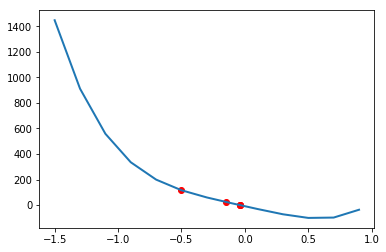



Digite a função f(x): 230*(x**4) + 18*(x**3) + 9*(x**2) - 221*x - 9
Deseja plotar o gráfico ao final? (s/n) s
Deseja visualizar a tabela de iterações ao final? (s/n) s
Digite o número máximo de iterações que deseja: 30
Digite o valor do chute inicial para a raiz: 0.5
Digite a tolerância desejada: 0.000001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 1

Iteração 	 pn 			 |p_n-p_(n-1)|
0 		 0.5000000000 		 1.2050898204
1 		 -0.7050898204 		 0.3812987061
2 		 -0.3237911142 		 0.2591879832
3 		 -0.0646031310 		 0.0239169799
4 		 -0.0406861512 		 0.0000268628
5 		 -0.0406592883 		 0.0000000000

O método encontrou uma aproximação da raiz após 5 iterações!
	 • O valor estimado para a raiz é:  -0.0406592883453349
	 • O valor do erro estimado é:  2.95760776980458e-11


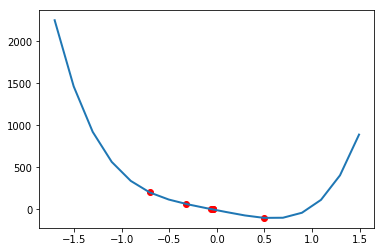

In [2]:
metodo_Newton()
print('\n')
metodo_Newton()

## 21 - 

In [ ]:
#Função Método de Newton para encontrar raízes de uma equação do tipo f(x)=0 - Versão 02
#Utiliza a biblioteca sympy, disponível em: http://docs.sympy.org/latest/index.html

import sympy as sp

def metodo_Newton(fx, p0, tipo_tol, tol, N0):
    # Parâmetros: 
    # fx: função do tipo f(x)=0 a qual se deseja encontrar a raiz, em string | p0: aproximação inicial para a raiz
    # tipo_tol: tipo de tolerância: 1: |p[n] - p[n-1]|; 2: |p[n] - p[n-1]|/|p[n]|; 3: |f(p[n])| ~= 0
    # tol: valor da tolerância | N0: número máximo de iterações
    
    x = sp.symbols('x')
    f = sp.sympify(fx) # obtém a função f(x)
    df = sp.diff(f, x, 1) # utiliza a biblioteca sympy para calcular f'(X) (a derivada primeira de f(x))

    # variáveis extras para o cálculo
    val_tol=0.0; fp0 = 0.0; dfp0 = 0.0; fp=0.0; n=0

    print ("Raiz de f(x) =", fx + ", com p0 =", str(p0) + ", pelo método de Newton\nn\t pn-1\t         f(pn-1)\t f'(pn-1)\t pn\t         f(pn)")

    # aplica o método de Newton
    fp0 = float(f.subs(x,p0)) # calcula f(p0)
    for n in range (1, N0+1):
        dfp0 = float(df.subs(x,p0)) # calcula a f'(p0)
        if (dfp0) == 0.0:
            print("A DERIVADA RESULTOU EM ZERO - IMPOSSÍVEL CONTINUAR")
            break
        p = p0 - (fp0 / dfp0) # aplica a aproximação do método de Newton
        fp = float(f.subs(x,p)) # calcula f(p)
        
        # calcula as condições de parada
        if (tipo_tol == 2 and p != 0.0): # a condição de parada será |p[n] - p[n-1]|/|p[n]|
            val_tol = abs((p-p0)/p)
        elif (tipo_tol == 3):
            val_tol = abs(fp) # a condição de parada será |f(p[n])|
        else: #se não foi escolhida a condição 2 ou 3, assume a condição 1
            val_tol = abs(p-p0) # a condição de parada será |p[n] - p[n-1]|
        
        # imprime os resultados da iteração n
        print (n, '\t', "{:.10f}".format(p0), '\t', "{:.10f}".format(fp0), '\t', "{:.10f}".format(dfp0), '\t', "{:.10f}".format(p), '\t', "{:.10f}".format(fp))
        # testa as condições de parada
        if (val_tol <= tol):
            print ("A raiz da função, dentro dos parâmetros de tolerância, é", p)
            break
        p0 = p
        fp0 = fp
    print ("O método de Newton foi encerrado após", n, "iterações.\n")
    #return (p)

metodo_Newton('4*(x**2) - exp(x) - exp(-x)', -10, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', -5, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', -3, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', -1, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', 0, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', 1, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', 3, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', 5, 1, 10**(-5), 50)
metodo_Newton('4*(x**2) - exp(x) - exp(-x)', 10, 1, 10**(-5), 50)

## (27) ## 

Os problemas que envolvem a quantia necessária para o pagamento de uma hipoteca durante um período fixo empregam a fórmula a seguir:

$$A=\frac{P}{i} [1 -(1+i)^{-n}],$$

denominada _equaçao da anuidade ordinária_. Nessa equação, A é o valor da hipoteca, P é a quantia de cada pagamento, e $i$ é a taxa de juros por período para n períodos de pagamento. Suponha que uma quantia de US$ 135 000,00 deva ser paga em 30 anos pela hipoteca de uma casa e que o mutuário possa pagar até US 1 000,00 por mês pela casa. Qual deve ser a taxa de juros máxima para que o mutuário possa pagar a hipoteca?

**Resposta:**

Para encontrar o valor de $i$ que satisfaça às condições estabelecidas, devemos reorganizar a equação e substituir os valores fornecidos para A, P e $n$, de maneira a obter uma equação com somente uma variável, $i$.

$$\frac{1000}{i} [1 -(1+i)^{-360}] = 135000 → \frac{1000}{i} - \frac{1000}{i.(1+i)^{360}} = 135000$$

Percebemos que essa equação não é muito apropriada para a aplicação de nenhum dos métodos, pois como  $i$ está no denominador, e se trata de um valor próximo de zero ($i$ é uma porcentagem), então devemos reescrever a função de uma maneira mais adequada.

Aplicando o $\log_{10}$ a toda a equação, temos:

$$\log_{10} (\frac{1000}{i}) - log_{10}(\frac{1000}{i.(1+i)^{360}} = log_{10}(135000) $$

$$\log_{10}(1000) - \log_{10}i -\log_{10}(1000) + \log_{10}(i) +\log_{10}(1+i)^{360} = \log_{10}(135) + \log_{10}(1000) $$

$$360.\log_{10}(1+i) - \log_{10}(135) = \log_{10}(1000) $$

$$360.\log_{10}(1+i) - \log_{10}(135) = 3 $$

$$\log_{10}(1+i) - \log_{10}(\sqrt[360]{135}) = \frac{3}{360} $$

$$\log_{10}\frac{1+i}{\sqrt[360]{135}} = \frac{1}{120} $$

Elevando 10 a ambos os lados da equação, e reorganizando-a, temos:

$$(1+i) =   \sqrt[360]{135} . \sqrt[120]{10}$$  

$$1+i = 1,033358288178 → i = 0,033358288178 = 3,3358\%$$

** A taxa máxima de juros para que o mutuário possa pagar a hipoteca é de 3,3358 $\%$ ao mês **

## (23)

A função descrita por $f(x)=ln(x^{2}+1)-e^{0.4x}cos(\pi/x)$ tem um número infinito de zeros.

a) Determine, com precisão de $10^{-6}$, o único zero negativo;

b) Determine, com precisão de $10^{-6}$, os quatros menores zeros positivos;

c) Determine, uma aproximação inicial razoável para determinar o n-ésimo menor zero positivo de f.
[Sugestão: esboce m gráfico aproximado de f]

d) Utilize a parte (C) para determinar, com precisão de $10^{-6}$, o 25º menor zero positivo de f.

### (Resolução 23 - Letra A)
a) Determine, com precisão de $10^{-6}$, o único zero negativo;

In [10]:
metodo_Newton()

Digite a função f(x): ln((x^2)+1)-(e^(0.4*x))(cos(pi/x))


TypeError: 'Pow' object is not callable

## (29) ## 

Seja $f(x)=3^{3x+1}-7 . 5^{2x}$.

**a)** Utilize os comandos _solve_ e _fsolve_ do Maple para tentar determinar todas as raízes de $f$.

Utilizando a plataforma WolframAlpha calcula-se que a função $f(x)$ possui raiz real aproximadamente igual a 11.0094386442. Além de raízes complexas na forma: $x≈12,994 i (6,2832 n - 0,84730 i)$.

**b)** Trace o gráfico de f(x) para encontrar aproximações iniciais das raízes de $f$.



**c)** Utilize o método de Newton para determinar as raízes de $f$ com precisão de $10^{-16} $.

**d)** Encontre as soluções exatas de $f(x)=0$ sem utilizar o Mapple.

In [ ]:
metodo_Newton() #Função 3**(3*x+1)-7*5**(2*x)

Digite a função f(x): 3**(3*x+1)-7*5**(2*x)
Deseja plotar o gráfico ao final? (s/n) n
Deseja visualizar a tabela de iterações ao final? (s/n) n
Digite o número máximo de iterações que deseja: 10
Digite o valor do chute inicial para a raiz: 10
Digite a tolerância desejada: 0.0001
Selecione o critério de parada: 1 - |p-p0|;  2 - |p-p0|/|p|;  3 - f(p): 2


## (31) ##

O modelo de crescimento populacional logístico é descrito por uma equação na forma

$$P(t) = \frac{{P}_{L}}{1 - ce^{-kt}},$$

onde ${P}_{L}$, $c$ e $k > 0$ são constantes, e $P(t)$ é a população no instante $t$. ${P}_{L}$ representa o valor-limite da população, pois $\lim_{t \to \infty} P(t) = {P}_{L}$. Utilize os dados do censo dos anos 1950, 1960 e 1970 fornecidos na tabela da página 101 para determinar as constantes ${P}_{L}$, $c$ e $k$ para um modelo de crescimento logístico.  Utilize o modelo logístico para calcular a população dos Estados Unidos em 1980 e 2010, supondo $t = 0$ em 1950. Compare os resultados obtidos para 1980 com o valor real.

**Resposta:**

Existem três constante que são incógnitas (${P}_{L}$, $c$ e $k > 0$) e é possível escrever três equações com os dados dos anos de 1950, 1960 e 1970 (uma para cada ano). Desta forma, é possível reescrever a equação do modelo de crescimento logístico em função de uma única incógnita. A incógnita escolhida será o $c$, pois ela se mostra mais fácil de ser isolada.

**Para 1950 (t = 0, população em milhares):**

$$P(0) = 151326 = \frac{{P}_{L}}{1 - ce^{-k.0}}$$

$$151326 = \frac{{P}_{L}}{1 - ce^{0}}$$

$$151326 = \frac{{P}_{L}}{1 - c}$$

$${P}_{L} = 151326(1 - c)$$

**Para 1960 (t = 10, população em milhares):**

$$P(10) = 179323 = \frac{{P}_{L}}{1 - ce^{-k.10}}$$

$$179323 = \frac{{P}_{L}}{1 - ce^{-k.10}}$$

$$1 - ce^{-k.10} = \frac{{P}_{L}}{179323}$$

$$-ce^{-k.10} = \frac{{P}_{L}}{179323} - 1$$

$$ce^{-k.10} = 1 - \frac{{P}_{L}}{179323}$$

$$ce^{-k.10} = \frac{179323 - {P}_{L}}{179323}$$

$$e^{-k.10} = \frac{179323 - {P}_{L}}{179323 c}$$

substituindo ${P}_{L}$ pela relação encontrada na equação do ano de 1950:

$$e^{-k.10} = \frac{179323 - 151326(1 - c)}{179323 c}$$

$$e^{-k.10} = \frac{27997 + 151326 c}{179323 c}$$

aplicando $ln()$ em ambos os lados:

$$\ln(e^{-k.10}) = \ln(\frac{27997 + 151326 c}{179323 c})$$

$$-10k \ln(e) = \ln(\frac{27997 + 151326 c}{179323 c})$$

$$-10k = \ln(\frac{27997 + 151326 c}{179323 c})$$

$$k = - \ln(\frac{27997 + 151326 c}{179323 c}) / 10$$

**Para 1970 (t = 20, população em milhares):**

$$P(20) = 203302 = \frac{{P}_{L}}{1 - ce^{-k.20}}$$

$$203302 = \frac{{P}_{L}}{1 - ce^{-k.20}}$$

substituindo ${P}_{L}$ e $-k$ pelos valores encontrados em 1950 e 1960, a equação se torna de uma única variável, em c, que pode ser determinada através de um dos métodos iterativos para determinação de raízes de funções de uma variável.

$$203302 = \frac{151326(1 - c)}{1 - ce^{(\ln(\frac{27997 + 151326 c}{179323 c})/10).20}}$$

$$203302 = \frac{151326(1 - c)}{1 - c(e^{\ln(\frac{27997 + 151326 c}{179323 c})})^{2}}$$

$$203302 = \frac{151326(1 - c)}{1 - c(\frac{27997 + 151326 c}{179323 c})^{2}}$$

$$\frac{151326(1 - c)}{1 - c(\frac{27997 + 151326 c}{179323 c})^{2}} - 203302 = 0.$$

Plotando o gráfico desta equação para obter as aproximações ${p}_{0}$ e ${p}_{1}$ para o método da Secante, e aplicando o método, com uma precisão de $10^{-7}$ para $|{p}_{n} - {p}_{n-1}|$ obtém-se $c$ = -0,7565812558.

Substituindo $c = -0,7565812558$ nas relações de ${P}_{L}$ e $k$, encontradas anteriormente, obtêm-se:

$${P}_{L} = 151326(1 - c) = 151326(1 + 0,7565812558) = 265816,415115$$

$$k = - \ln(\frac{27997 + 151326 c}{179323 c}) / 10 = - \ln(\frac{27997 + 151326 (-0,7565812558)}{179323 (-0,7565812558)})  / 10 = 0,045017502246$$

Para **1980 (t = 30)**, usando os valores encontrados para ${P}_{L}$, $c$ e $k$, a população, em milhares, é:

$$P(t) = \frac{{P}_{L}}{1 - ce^{-kt}}$$

$$P(30) = \frac{265816,415115}{1 - (-0,7565812558)e^{-0,045017502246 . 30}}$$

$$P(30) \approx 222.248$$

Comparado ao valor real, que é de 226.542, houve uma diferença de 4.294 (4 milhões e 294 mil pessoas) para menos. Isso demonstra que este modelo depende de ajustes das constantes a cada década, principalmente o valor-limite da população (${P}_{L}$).

Para **2010 (t = 60)** o modelo mostra uma discrepância ainda maior (população em milhares):

$$P(t) = \frac{{P}_{L}}{1 - ce^{-kt}}$$

$$P(60) = \frac{265816,415115}{1 - (-0,7565812558)e^{-0,045017502246 . 60}}$$

$$P(60) \approx 252.967$$

Quando o censo mostra que em 2010 a população dos Estados Unidos era de 309.300 milhares de habitantes.

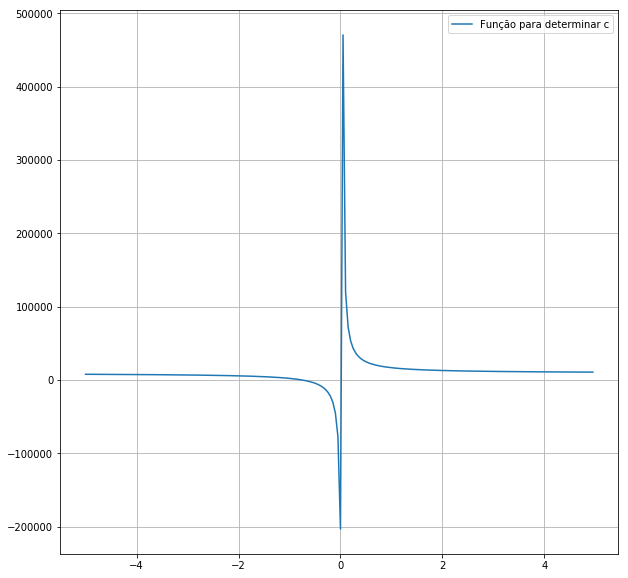

Questão 31. Achando c do modelo de crescimento logístico, com p0 = -1.0 e p1 = -0.5
Método da Secante, com p0 = -1.0 e p1 = -0.5  tolerância de 1e-07 
n	 pn	         f(pn)
0 	 -1.0000000000 	 2164.8071511812
1 	 -0.5000000000 	 -4417.5281174863
2 	 -0.8355593370 	 835.1700189980
3 	 -0.7822059764 	 288.6818170479
4 	 -0.7540221199 	 -29.8614330685
5 	 -0.7566641797 	 0.9643710972
6 	 -0.7565815241 	 0.0031211207
7 	 -0.7565812557 	 -0.0000003272
8 	 -0.7565812558 	 0.0000000000
A raiz da função, dentro dos parâmetros de tolerância, é -0.7565812557706082
O método da Secante foi encerrado após 8 iterações.


-0.7565812557706082

In [19]:
# Exercícios 2.3 - Questão 31.

from numpy import *
import matplotlib.pyplot as plt

def f(c): # função f(c) para encontrar o c do modelo de crescimento logístico
    return ((151326*(1 - c)) / (1 - c*(((27997 + 151326*c) / (179323*c)))**2)) - 203302

# Plota o gráfico da função
plt.rcParams['figure.figsize'] = 10, 10 # Tamanho da figura
x = arange(-5, 5, 0.05)
plt.plot(x, f(x), label="Função para determinar c")
plt.legend(); plt.grid(); plt.show()

print("Questão 31. Achando c do modelo de crescimento logístico, com p0 = -1.0 e p1 = -0.5") 
metodo_Secante(f, -1.0, -0.5, 1, 0.0000001, 30)

## (33) ##

O jogador A eliminará (ganha por 21 a 0) o jogador B em uma partida de raquetebol com probabilidade

$$P = \frac{1+p}{2}(\frac{p}{1-p+p^2})^{21} .$$

onde p denota a probabilidade de A vencer qualquer rebatida específica (independente do sacador), (consulte [Keller, J.], pág. 267). Determine com precisão de $10^{-3}$, o valor mínimo de p que garanta que A eliminará B em pelo menos metade das partidas jogadas.

Probabilisticamente falando, a condição que garanta que o jogador A eliminará B em pelo menos metade das partidas jogada equivale ao valor $P=50\%=0,5$. Substituindo esse valor na equação, chegamos a:

$$ 0,5 = \frac{1+p}{2}(\frac{p}{1-p+p^2})^{21}.$$

Aplicando o método da secante à equação acima, temos que, em 12 iterações, o resultado o valor de p necessário para garantir a condição desejada é $p=$__1,2168256914196003__.

In [4]:
# Solução da equação ((1+x)/2)*(x/(1-x+x**2))**21-0.5 = 0
metodo_Secante(lambda x:(((1+x)/2)*(x/(1-x+x**2))**21-0.5), 0.0, 1.0, 1, 0.000001, 30)

Método da Secante, com p0 = 0.0 e p1 = 1.0  tolerância de 1e-06 
n	 pn	         f(pn)
0 	 0.0000000000 	 -0.5000000000
1 	 1.0000000000 	 0.5000000000
2 	 0.5000000000 	 -0.4998496357
3 	 0.7499624033 	 -0.3371648009
4 	 1.2680102229 	 -0.1434806001
5 	 1.6517782933 	 -0.4891578872
6 	 1.1087192453 	 0.3438681440
7 	 1.3328907597 	 -0.2819833353
8 	 1.2318881522 	 -0.0450238773
9 	 1.2126969832 	 0.0126884633
10 	 1.2169162964 	 -0.0002768767
11 	 1.2168261924 	 -0.0000015309
12 	 1.2168256914 	 0.0000000002
A raiz da função, dentro dos parâmetros de tolerância, é 1.2168256914196003
O método da Secante foi encerrado após 12 iterações.


In [12]:
x = sp.symbols('x') #Define x como a variável da função f(x) a ser especificada pelo usuário 
fx = sp.sympify(input("Digite a função f(x): ")) #Solicita que o usuário entre com a função f(X)

print(fx.subs(x,0))


Digite a função f(x): ((1+x)/2)*(x/(1-x+x**2))**21-0.5
-0.500000000000000
